In [2]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import time
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from openpyxl import Workbook  # Add this import for creating Excel files

In [3]:
# 📂 1. Load ETTh2 Data from local file
file_path = "../data/raw/ETTh2.csv"

df_etth2 = pd.read_csv(file_path)

print("✅ ETTh2 dataset loaded from local file!")
print(df_etth2.head())

✅ ETTh2 dataset loaded from local file!
                  date       HUFL    HULL       MUFL   MULL   LUFL   LULL  \
0  2016-07-01 00:00:00  41.130001  12.481  36.535999  9.355  4.424  1.311   
1  2016-07-01 01:00:00  37.528000  10.136  33.936001  7.532  4.435  1.215   
2  2016-07-01 02:00:00  37.946999  11.309  35.330002  9.007  2.100  0.000   
3  2016-07-01 03:00:00  38.952000  11.895  35.543999  9.436  3.380  1.215   
4  2016-07-01 04:00:00  38.113998  11.476  35.410000  9.623  2.036  0.000   

          OT  
0  38.661999  
1  37.124001  
2  36.465000  
3  33.608501  
4  31.850500  


In [4]:
# 📜 2. Preprocessing
# Update them according to your preprocessing!

file_path_etth1 = "../data/raw/ETTh1.csv"

df_etth1 = pd.read_csv(file_path_etth1)

# Get min and max for 'OT' column
min_OT = df_etth1['OT'].min()
max_OT = df_etth1['OT'].max()

df_etth2['OT'] = (df_etth2['OT'] - min_OT) / (max_OT - min_OT)

print("\n✅ Preprocessing applied (normalization)!")
print(df_etth2[['date', 'OT']].head())


✅ Preprocessing applied (normalization)!
                  date        OT
0  2016-07-01 00:00:00  0.853355
1  2016-07-01 01:00:00  0.822649
2  2016-07-01 02:00:00  0.809491
3  2016-07-01 03:00:00  0.752461
4  2016-07-01 04:00:00  0.717362



✅ Preprocessing applied (normalization)!
                  date        OT
0  2016-07-01 00:00:00  0.098496
1  2016-07-01 01:00:00  0.097883
2  2016-07-01 02:00:00  0.097620
3  2016-07-01 03:00:00  0.096481
4  2016-07-01 04:00:00  0.095781


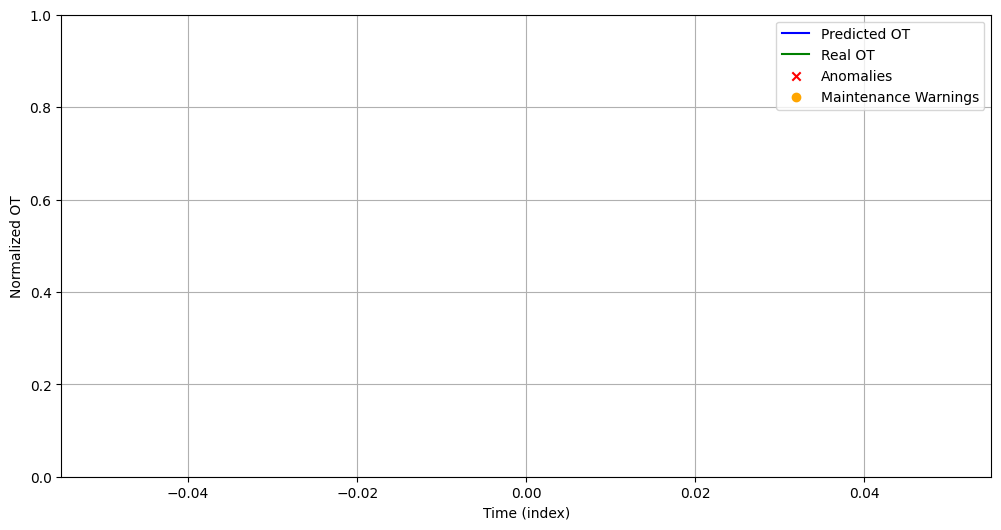

In [5]:
# Data for plotting

# Initialize the plot
plt.ion()  # Interactive mode on
fig, ax = plt.subplots(figsize=(12, 6))
line_pred, = ax.plot([], [], label="Predicted OT", color='blue')
line_real, = ax.plot([], [], label="Real OT", color='green')
scatter_anomalies = ax.scatter([], [], color='red', marker='x', label="Anomalies")
scatter_maintenance = ax.scatter([], [], color='orange', marker='o', label="Maintenance Warnings")
ax.set_ylim(0, 1)
ax.set_xlabel("Time (index)")
ax.set_ylabel("Normalized OT")
ax.legend()
ax.grid()
# ❗ IMPORTANT: These min and max values must be same as ETTh1 preprocessing min-max
# Update them according to your preprocessing!

file_path_etth1 = "../data/raw/ETTh1.csv"

df_etth1 = pd.read_csv(file_path_etth1)

# Get min and max for 'OT' column
min_OT = df_etth1['OT'].min()
max_OT = df_etth1['OT'].max()

df_etth2['OT'] = (df_etth2['OT'] - min_OT) / (max_OT - min_OT)

print("\n✅ Preprocessing applied (normalization)!")
print(df_etth2[['date', 'OT']].head())

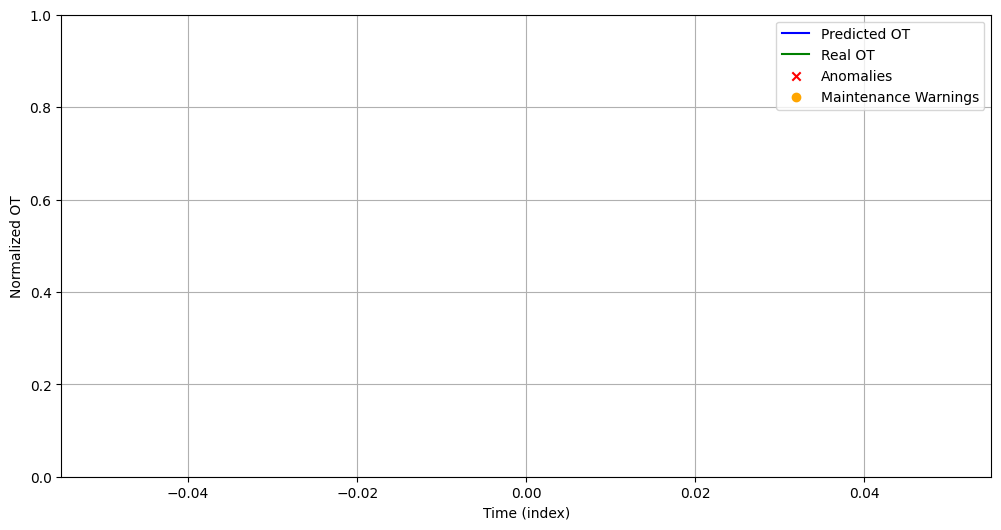

In [6]:
# Data for plotting

# Initialize the plot
plt.ion()  # Interactive mode on
fig, ax = plt.subplots(figsize=(12, 6))
line_pred, = ax.plot([], [], label="Predicted OT", color='blue')
line_real, = ax.plot([], [], label="Real OT", color='green')
scatter_anomalies = ax.scatter([], [], color='red', marker='x', label="Anomalies")
scatter_maintenance = ax.scatter([], [], color='orange', marker='o', label="Maintenance Warnings")
ax.set_ylim(0, 1)
ax.set_xlabel("Time (index)")
ax.set_ylabel("Normalized OT")
ax.legend()
ax.grid()

# Initialize lists
times = []
predicted_ots = []
real_ots = []
anomalies = []
maintenance_alerts = []

In [8]:
try:
    while True:
        # Simulate fetching real-time data
        for index, row in df_etth2.iterrows():
            real_ot = row['OT']  # Assuming 'OT' is the real-time value
            pred_ot = np.random.random()  # Simulated prediction
            preds = {
                'LSTM_Prediction': np.random.random(),
                'PatchTST_Prediction': np.random.random(),
                'LLM_Prediction': np.random.random()
            }

            # Update real_ots and predicted_ots lists
            real_ots.append(real_ot)
            predicted_ots.append(pred_ot)

            # Update anomalies and maintenance warnings
            anomaly_detected = real_ot > 0.8  # Example condition for anomaly
            predictive_maintenance = pred_ot > 0.7  # Example condition for maintenance
            if anomaly_detected:
                anomalies.append(index)
            if predictive_maintenance:
                maintenance_alerts.append(index)

            anomaly_points = np.array([[i, real_ots[i]] for i in anomalies if i < len(real_ots)])
            if len(anomaly_points) > 0:
                scatter_anomalies.set_offsets(anomaly_points)

            maintenance_points = np.array([[i, predicted_ots[i]] for i in maintenance_alerts if i < len(predicted_ots)])
            if len(maintenance_points) > 0:
                scatter_maintenance.set_offsets(maintenance_points)

            # Recalculate axis limits and scale
            ax.relim()
            ax.autoscale_view()

            # Pause to allow plot to update
            plt.pause(0.01)

            # Debug: Print current time and predictions
            print(f"Time: {row['date']} | Real OT: {real_ot} | Predicted OT: {pred_ot}")

            # Store results
            result_row = {
                "Time": row['date'],
                "Real OT": real_ot,
                "Predicted OT": pred_ot,
                "Anomaly Detected": anomaly_detected,
                "Predictive Maintenance": predictive_maintenance,
                "Energy Efficiency": pred_ot < 0.6,
                "LSTM Prediction": preds['LSTM_Prediction'],
                "PatchTST Prediction": preds['PatchTST_Prediction'],
                "LLM Prediction": preds['LLM_Prediction']
            }

            # Ensure the output directory exists
            output_dir = "../../outputs/results"
            os.makedirs(output_dir, exist_ok=True)

            # Append to DataFrame and write to Excel
            result_df = pd.DataFrame([result_row])
            output_file = os.path.join(output_dir, "prediction_results.xlsx")
            with pd.ExcelWriter(output_file, mode='a', if_sheet_exists='overlay', engine='openpyxl') as writer:
                result_df.to_excel(writer, index=False, header=writer.sheets.get('Sheet1') is None, startrow=writer.sheets.get('Sheet1').max_row if writer.sheets.get('Sheet1') else 0)

except requests.exceptions.RequestException as e:
    print(f"❌ Request failed: {e}")

# Sleep for 1 second to simulate real-time data
time.sleep(1)

plt.ioff()  # Turn off interactive mode
plt.show()

print(f"\n✅ Results saved to {'../../outputs/results/prediction_results.xlsx'} successfully!")

Time: 2016-07-01 00:00:00 | Real OT: 0.09849571888035304 | Predicted OT: 0.8324494266221487
Time: 2016-07-01 01:00:00 | Real OT: 0.09788265491665019 | Predicted OT: 0.6838632035847504
Time: 2016-07-01 02:00:00 | Real OT: 0.0976199696967057 | Predicted OT: 0.1296658428046742
Time: 2016-07-01 03:00:00 | Real OT: 0.09648133609678258 | Predicted OT: 0.7898668993629236
Time: 2016-07-01 04:00:00 | Real OT: 0.09578057632839182 | Predicted OT: 0.6513177145004602
Time: 2016-07-01 05:00:00 | Real OT: 0.09525500669217159 | Predicted OT: 0.5800472246780419
Time: 2016-07-01 06:00:00 | Real OT: 0.09508001651662365 | Predicted OT: 0.31637049546869334
Time: 2016-07-01 07:00:00 | Real OT: 0.0949923214722271 | Predicted OT: 0.09768662707970899
Time: 2016-07-01 08:00:00 | Real OT: 0.09490462718812187 | Predicted OT: 0.45522328489503505
Time: 2016-07-01 09:00:00 | Real OT: 0.09472943705595135 | Predicted OT: 0.9547018380709166
Time: 2016-07-01 10:00:00 | Real OT: 0.09402887724418318 | Predicted OT: 0.7217

Exception ignored in: <function ZipFile.__del__ at 0x106a1cea0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipfile/__init__.py", line 1986, in __del__
    def __del__(self):
KeyboardInterrupt: 


Time: 2016-08-19 03:00:00 | Real OT: 0.10089954721793011 | Predicted OT: 0.016213628399796787
Time: 2016-08-19 04:00:00 | Real OT: 0.10063666280165437 | Predicted OT: 0.22090363831754967
Time: 2016-08-19 05:00:00 | Real OT: 0.10037397758170986 | Predicted OT: 0.2825949678089904
Time: 2016-08-19 06:00:00 | Real OT: 0.10011129236176537 | Predicted OT: 0.19426985942458408
Time: 2016-08-19 07:00:00 | Real OT: 0.10011129236176537 | Predicted OT: 0.8355532937297537
Time: 2016-08-19 08:00:00 | Real OT: 0.10054916695358906 | Predicted OT: 0.1363160369318347
Time: 2016-08-19 09:00:00 | Real OT: 0.10142491765781908 | Predicted OT: 0.6465437654149129
Time: 2016-08-19 10:00:00 | Real OT: 0.10195048577345665 | Predicted OT: 0.3275375425581344
Time: 2016-08-19 11:00:00 | Real OT: 0.10265124630213876 | Predicted OT: 0.8357886501291469
Time: 2016-08-19 12:00:00 | Real OT: 0.10308932009029369 | Predicted OT: 0.7271567094844584
Time: 2016-08-19 13:00:00 | Real OT: 0.10352699548578612 | Predicted OT: 0.7

KeyboardInterrupt: 